## Demo for querying results with Sqlite
- We can generate some charts and results based on `./score/result.txt` using Pandas and Sqlite

In [19]:
import pandas as pd
from store_metrics import metricsDB
import seaborn as sns
import matplotlib.pyplot as plt

## Initialize Database

In [20]:
db_path = 'metrics.db'
score_path = './score/result.txt'
config = {'db_path': db_path,
          'score_path': score_path}

thisDB = metricsDB(config)

metrics.db
./score/result.txt
created connection


## Select by Method

In [21]:
df = pd.read_sql_query("SELECT * from scores where Method in ('Method_1','Method_2') order by Dataset", thisDB.con)
df

,Dataset,Method,mae,max_fmeasure,mean_fmeasure,adp_fmeasure,S_measure_alpha05,Fbw_measure,mean_IoU,relax_fmeasure
0,Dataset_1,Method_1,0.0217,0.9218,0.9017,0.8951,0.9262,0.8753,0.9149,0.6488
1,Dataset_1,Method_2,0.0205,0.9314,0.9134,0.9077,0.9383,0.8927,0.9231,0.7030
2,Dataset_2,Method_1,0.0555,0.8689,0.8571,0.8621,0.8581,0.8449,0.8574,0.6377
3,Dataset_2,Method_2,0.0435,0.8927,0.8842,0.8891,0.8939,0.8729,0.8852,0.6925


## Convert Dataframe from wide to long format

In [22]:
long_df = pd.melt(df, id_vars=['Dataset','Method'], value_vars=['mae', 'max_fmeasure', 'mean_fmeasure',
       'adp_fmeasure', 'S_measure_alpha05', 'Fbw_measure', 'mean_IoU'])

long_df.columns = ['Dataset','Method','Metrics','Value']
long_df.head()

,Dataset,Method,Metrics,Value
0,Dataset_1,Method_1,mae,0.0217
1,Dataset_1,Method_2,mae,0.0205
2,Dataset_2,Method_1,mae,0.0555
3,Dataset_2,Method_2,mae,0.0435
4,Dataset_1,Method_1,max_fmeasure,0.9218


## Generate comparison bar plots by metrics

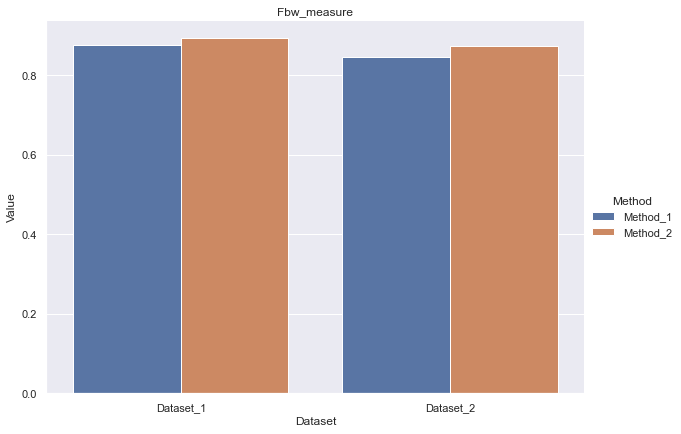

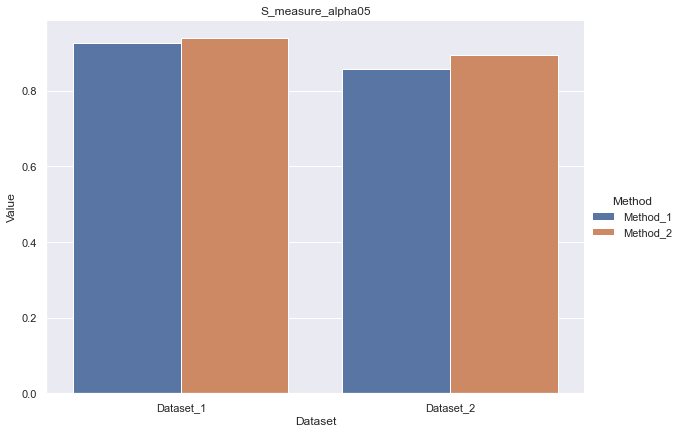

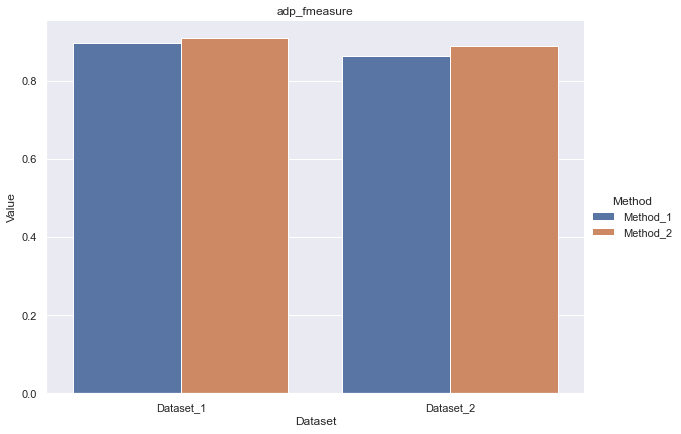

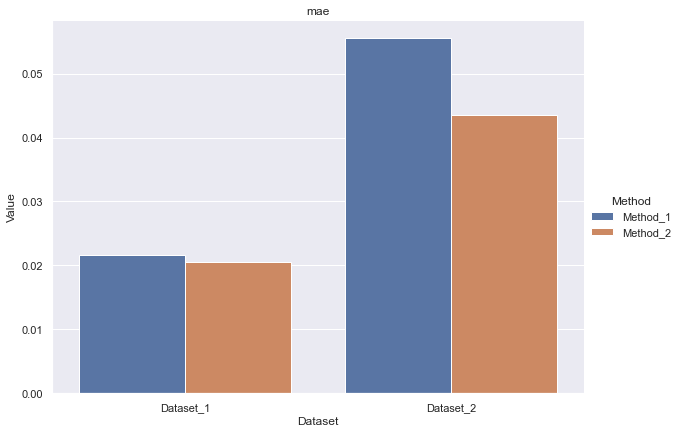

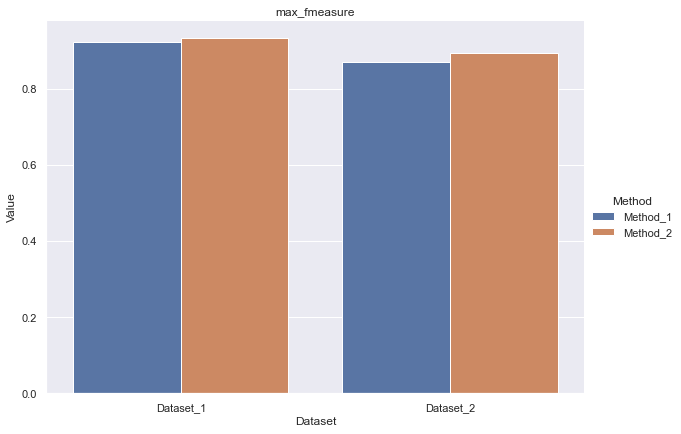

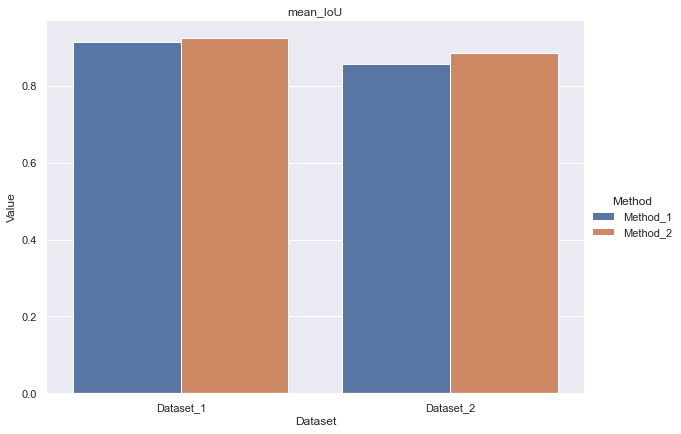

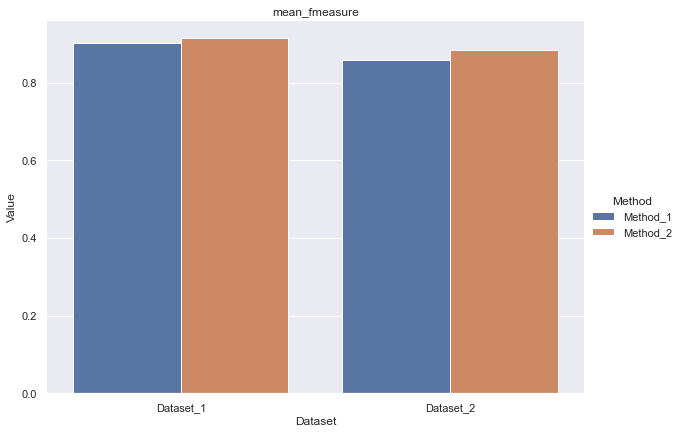

In [41]:
long_df_dict = { x:y for x, y in long_df.groupby('Metrics', as_index=False)}

sns.set_style("darkgrid")
#sns.set(rc={'figure.figsize':(18,12)})

def compare_plot_by_metrics(category,df):
    sns.catplot(x = "Dataset",       # x variable name
            y = "Value",       # y variable name
            hue = "Method",  # group variable name
            data = df,     # dataframe to plot
            kind = "bar",
            height=6, 
#               )
            #figsize=(10,12))
            aspect=1.4)

    plt.title('{}'.format(category))
    
for key, value in long_df_dict.items():
    compare_plot_by_metrics(key,value)